In [46]:
from pathlib import Path
flowers = Path('flower_photos')

In [47]:
num_images = len(list(flowers.glob('*/*.jpg')))
print(num_images)

3670


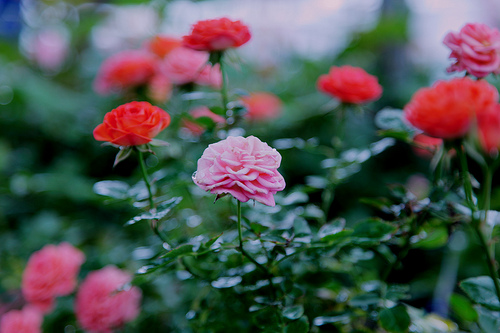

In [48]:
from PIL import Image

roses = list(flowers.glob('roses/*'))
Image.open(roses[1])

In [49]:
from keras.utils import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    flowers,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(128, 128)
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [50]:
val_ds = image_dataset_from_directory(
    flowers,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(128, 128)
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [51]:
class_names = train_ds.class_names

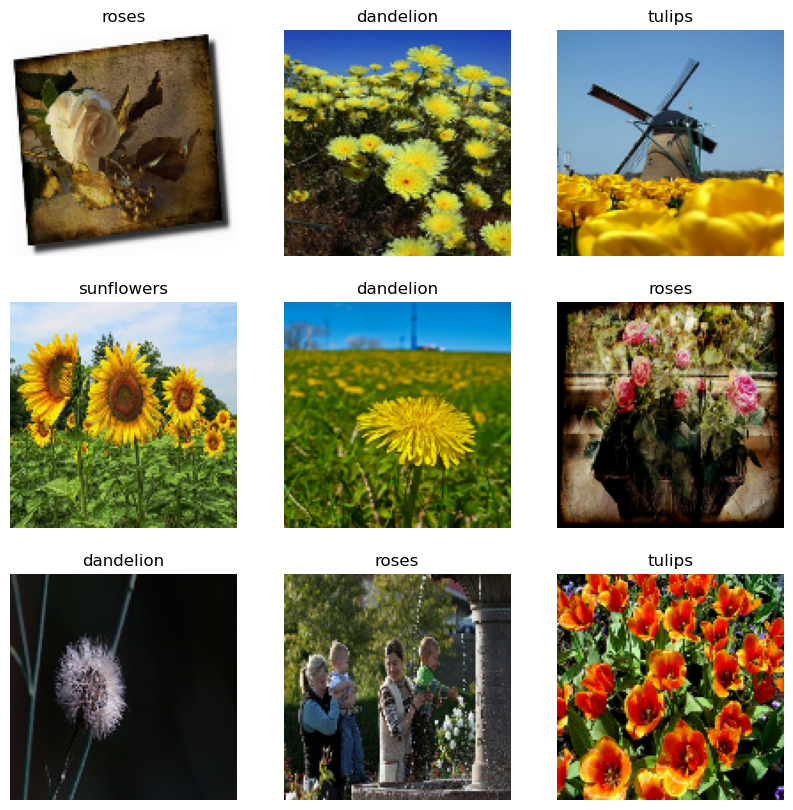

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [53]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 128, 128, 3)
(32,)


In [54]:
import tensorflow as tf

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Rescaling

model = Sequential([
    Rescaling(1.0/255.0),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [56]:
from keras.losses import SparseCategoricalCrossentropy

model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [57]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20


2023-01-20 22:09:00.013357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


92/92 [==============================] - ETA: 0s - loss: 1.2399 - accuracy: 0.4704

2023-01-20 22:09:03.776927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


92/92 [==============================] - 5s 43ms/step - loss: 1.2399 - accuracy: 0.4704 - val_loss: 1.0224 - val_accuracy: 0.5817
Epoch 2/20
92/92 [==============================] - 3s 37ms/step - loss: 0.9871 - accuracy: 0.6104 - val_loss: 0.9558 - val_accuracy: 0.6063
Epoch 3/20
92/92 [==============================] - 3s 34ms/step - loss: 0.8536 - accuracy: 0.6625 - val_loss: 0.9746 - val_accuracy: 0.6117
Epoch 4/20
92/92 [==============================] - 3s 35ms/step - loss: 0.7321 - accuracy: 0.7214 - val_loss: 0.9239 - val_accuracy: 0.6431
Epoch 5/20
92/92 [==============================] - 3s 35ms/step - loss: 0.5728 - accuracy: 0.7892 - val_loss: 0.9451 - val_accuracy: 0.6485
Epoch 6/20
92/92 [==============================] - 3s 35ms/step - loss: 0.4320 - accuracy: 0.8546 - val_loss: 1.0356 - val_accuracy: 0.6376
Epoch 7/20
92/92 [==============================] - 3s 34ms/step - loss: 0.3517 - accuracy: 0.8818 - val_loss: 1.2986 - val_accuracy: 0.5995
Epoch 8/20
92/92 [======